![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>

<b>The [Fashion-MNIST dataset]</b> is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

<b> Content<b>

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

    To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
    For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.


<b> Labels <b>

Each training and test example is assigned to one of the following labels:

    0 T-shirt/top
    1 Trouser
    2 Pullover
    3 Dress
    4 Coat
    5 Sandal
    6 Shirt
    7 Sneaker
    8 Bag
    9 Ankle boot



<b> Objective : (https://www.openml.org/d/40996) contains 70,000 images of Zalando fashion products, classified into 10 types of clothing, each represented by 28 by 28 pixel values. We's see how well we can classify these with linear models.

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Import the Libraries

In [1]:
# Auto-setup when running on Google Colab
if 'google.colab' in str(get_ipython()):
    !pip install openml

# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openml as oml
from matplotlib import cm

# Hide convergence warning for now
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action="ignore", category=ConvergenceWarning)

#### <font color = blue>Import the Dataset

In [2]:
fmnist = oml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute);
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal",
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

/home/edouardo/.local/lib/python3.8/site-packages/openml/datasets/functions.py:438: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  warnings.warn(


Nous importons le dataset 40996, et nous chargons dans X les caracteristiques, et dans y les étiquettes.

### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Visualization </font>

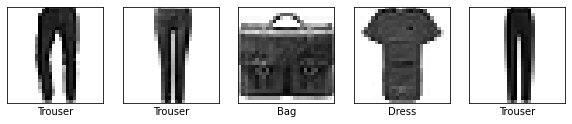

In [6]:
# Take 5 random examples, reshape to a 28x28 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X.values[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[int(y.values[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> A quick benchmark</font>
In this part, we'll try the default [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [Linear SVMs](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html?highlight=linearsvc#sklearn.svm.LinearSVC). Click the links to read the documentation. We'll also compare it to [k-Nearest Neighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) as a point of reference. To see whether our models are overfitting, we also evaluate the training set error. This can be done using [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) instead of  [`cross_val_scores`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score).

For now we are just interested in a quick approximation, so we don't use the full dataset for our experiments. Instead, we use 10% of our samples:

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5> </font> <font color = #41EA46> Implementation with Scikit-Learn </font>

#### <font color = blue> Import Models from Scikit-learn

In [12]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

#### <font color = blue> Take a 10% stratified subsample
    With this small sample of our data we can now train and evaluate the three classifiers.

In [4]:
# Take a 10% stratified subsample to speed up experimentation
Xs, _, ys, _ = train_test_split(X, y, stratify=y, train_size=0.1)

On charge dans Xs, 10% des données totales (caracteristiques) et dans ys, 10% des données totales également (étiquettes), pour l'entrainement. L'option stratify=y, garantit que la répartition des classes dans le sous-ensemble d'entraînement est similaire à celle dans l'ensemble de données d'origine. Cela est utile pour maintenir la répartition des classes équilibrée entre les deux ensembles.


### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 1.1</font>

 Implement a function below which evaluates each classifier passed into it on the given data, and then returns both the train and test scores of each as a list. You are allowed to import additional functions from whichever module you like, but you should be able to complete the function with [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) function and standard Python built-ins. Below the function you will find example output.

In [23]:
def evaluate_learners(classifiers, X, y, kfolds = 3):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data.

    Given a list of scikit-learn classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:
     [Classifier1 train score, ..., ClassifierN train score], [Classifier1 test score, ..., ClassifierN test score]
    """
    
    '''
    EXPLICATION DE LA FONCTION CROSS_VALIDATE
    
    La fonction cross_validate de la bibliothèque scikit-learn est utilisée pour évaluer les performances 
    d'un modèle d'apprentissage automatique. Elle utilise une technique de validation croisée, 
    en particulier la validation croisée en k-fold.

    La validation croisée consiste à diviser l'ensemble de données en plusieurs parties, 
    ou "plis", pour évaluer la capacité du modèle à généraliser sur de nouvelles données. 
    La validation croisée en k-fold divise les données en k plis, puis itère sur ces plis. 
    À chaque itération, l'un des plis est utilisé comme ensemble de test, 
    tandis que les autres sont utilisés comme ensemble d'entraînement. 
    Ce processus est répété k fois, de manière à ce que chaque pli soit utilisé une fois comme ensemble de test.
    '''
    # Nous effectuons ici une validation croisée pour tous les classifiers contenues dans classifiers avec les données X et y
    # en utilisant tous les processeurs disponibles, et en renvoyant
    # les résultat d'entrainement ainsi que les résultats de tests
    # Evaluate with 3-fold cross-validation.
    xvals = [cross_validate(clf, X, y, cv=kfolds, return_train_score= True, n_jobs=-1) for clf in classifiers]
    
    
    # Pour chaque classifiers, nous prenons les résultats d'entrainement obtenus pour les données X et y
    train_scores = [x['train_score'] for x in xvals]
    
    
    # Pour chaque classifiers, nous prenons les résultats de tests obtenus pour les données X et y
    test_scores = [x['test_score'] for x in xvals]
    
    
    # Nous retournons les résultats d'entrainement ainsi que de tests
    return train_scores, test_scores

# # Example output:
# train_scores, test_scores = ([[0.92 , 0.924, 0.916, 0.917, 0.921],  # Classifier 1 train score for each of 5 folds.
#                               [0.963, 0.962, 0.953, 0.912, 0.934],  # Classifier 2 train score for each of 5 folds.
#                               [0.867, 0.868, 0.865, 0.866, 0.866]], # Classifier 3 train score for each of 5 folds.
#                              [[0.801, 0.811, 0.806, 0.826, 0.804],  # Classifier 1 test score for each of 5 folds.
#                               [0.766, 0.756, 0.773, 0.756, 0.741],  # Classifier 2 test score for each of 5 folds.
#                               [0.804, 0.814, 0.806, 0.821, 0.806]]) # Classifier 3 test score for each of 5 folds.

#### <font color = blue> Clues about the solution</font>

In [ ]:
# MODEL IMPLEMENTATION:
def evaluate_learners_indice(classifiers, X, y):
    """ Evaluate each classifier in 'classifiers' with cross-validation on the provided (X, y) data.

    Given a list of classifiers [Classifier1, Classifier2, ..., ClassifierN] return two lists:
     - a list with the scores obtained on the training samples for each classifier,
     - a list with the test scores obtained on the test samples for each classifier.
     The order of scores should match the order in which the classifiers were originally provided. E.g.:
     [Classifier1 train scores, ..., ClassifierN train scores], [Classifier1 test scores, ..., ClassifierN test scores]
    """
    # Evaluate with 3-fold cross-validation.
    xvals = [cross_validate(clf, X, y, return_train_score= true, n_jobs=-1) for clf in classifiers]
    train_scores = [x['train_score'] for x in ...]
    test_scores = [x['test_score'] for x in ....]
    return train_scores, ...


### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 1.2</font>

 Call the function you created with a Logistic Regression, Linear SVM, and k-Nearest Neighbors Classifier.
Store the return values in the variables `train_scores` and `test_scores`. Then, run the code given below to produce a plot visualizing the scores.

In [ ]:
# Dummy code. Replace with the actual classifiers and scores
classifiers = [LogisticRegression(), LinearSVC(), KNeighborsClassifier()]
# train_scores, test_scores = [[0.6,0.7,0.8]], [[0.5,0.6,0.7]]
train_scores, test_scores = evaluate_learners(classifiers, Xs, ys)

On évalue ces 3 différents classifiers, avec les 10% de données qu'on a construit juste avant, Xs et ys. On collecte les resultats d'entrainements et de tests des différents classifiers,  dans les variables train_scores et test_scores.

### <font color = #27C3E5> </font> <font color = #41EA46> Visualize the Results </font>

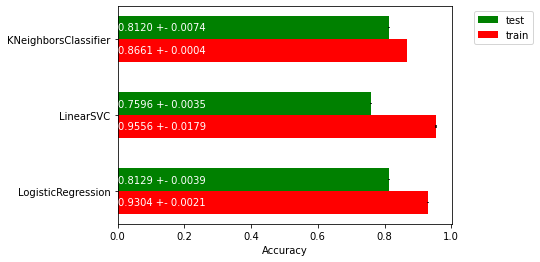

In [14]:
# Plot a bar chart of the train and test scores of all the classifiers, including the variance as error bars
fig, ax = plt.subplots()
width=0.3
ax.barh(np.arange(len(train_scores)), np.mean(test_scores, axis=1), width,
        yerr= np.std(test_scores, axis=1), color='green', label='test')
ax.barh(np.arange(len(train_scores))-width, np.mean(train_scores, axis=1), width,
        yerr= np.std(train_scores, axis=1), color='red', label='train')
for i, te, tr in zip(np.arange(len(train_scores)),test_scores,train_scores):
    ax.text(0, i, "{:.4f} +- {:.4f}".format(np.mean(te),np.std(te)), color='white', va='center')
    ax.text(0, i-width, "{:.4f} +- {:.4f}".format(np.mean(tr),np.std(tr)), color='white', va='center')
ax.set(yticks=np.arange(len(train_scores))-width/2, yticklabels=[c.__class__.__name__ for c in classifiers])
ax.set_xlabel('Accuracy')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

On dessine les résultats obtenus précedemment, pour chaque modéle nous avons les résultats train et tests, et on a en comparaison les autres modéles.

### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 1.3</font>
Interpret the plot. Which is the best classifier? Are any of the models overfitting? If so, what can we do to solve this? Is there a lot of variance in the results?

Le meilleur modèle semble être le KNN, pour plusieurs raisons. Il a un score de train et de tests assez rapproché ce qui indique un modèle stable et non ovrefit. Pour le tests, la variance est largement supérieur à l'entrainement ou même aux autres tests des autres modéles, ce qui peut indiquer une meilleure généralisation. Concernant les 2 autres modéles, on peut déduire des modéles overfités. Les résultats de train sont excellents comparés aux résultats de tests. Pour résoudre cela, plusieurs options, on peut collecter plus de données, ou faire de la régularisation sur nos données par exemple, également.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Regularization </font>
In this part, We will now tune these algorithm's main regularization hyperparameter: the misclassification cost in SVMs (C), the regularization parameter in logistic regression (C), and the number of neighbors (n_neighbors) in kNN. We expect the optimum for the C parameters to lie in $[10^{-12},10^{12}]$ and for n_neighbors between 1 and 50. C should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]) and k should be varied uniformly (i.e. [1,2,3,4]).

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 2.1</font>

 Vary the regularization parameters in the range given above and, for each classifier, create a line plot that plots both the training and test score for every value of the regularization hyperparameter. Hence, you should produce 3 plots, one for each classifier. Use the default 5-fold cross validation for all scores, but only plot the means.

Hints:
* Think about the time complexity of these models. Trying too many hyperparameter values may take too much time.
* You can make use of numpy's [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html), [geomspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html?highlight=geomspace#numpy.geomspace), and [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) functions.
* You can use matplotlib's default [plot](https://matplotlib.org/tutorials/introductory/pyplot.html) function to plot the train and test scores.
* You can manually loop over the hyperparameter ranges, or you can already check out scikit-learn's [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) function to save some programming.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_c = {'C': np.logspace(-12, 12, num=22)}
# Linspace -> Uniforme
param_k = {'n_neighbors': np.linspace(1, 50, num=12, dtype=int)}
grid = [param_c, param_c, param_k]
# On fais une recherche d'hyperparamètres pour trois modèles de classification
grid_searches = [GridSearchCV(clf, grid, n_jobs=-1, cv=5, return_train_score=True).fit(Xs, ys) for clf,grid in zip(classifiers,grid)]

#### Solution

In [ ]:
"""
from sklearn.model_selection import GridSearchCV

param_c = {'C': np.logspace(-12, 12, num=22)}
param_k = {'n_neighbors': np.geomspace(1, 50, num=12, dtype=int)[1:]}
grids = [param_c, param_c, param_k]
grid_searches = [GridSearchCV(clf, grid, n_jobs=-1, cv=3, return_train_score=True).fit(Xs, ys) for clf,grid in zip(classifiers,grids)]
"""

In [28]:
# Generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name, ax):
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    ax.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    ax.set_xscale('log')
    ax.set_title(grid_search.best_estimator_.__class__.__name__)
    bp, bs = grid_search.best_params_[param_name], grid_search.best_score_
    ax.text(bp,bs,"  C:{:.2E}, ACC:{:.4f}".format(bp,bs))

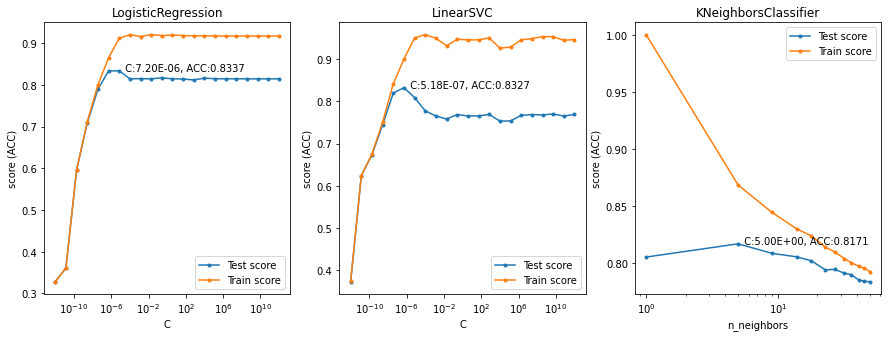

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
for grid_search, param, ax in zip(grid_searches,['C','C','n_neighbors'],axes):
    plot_tuning(grid_search, param, ax)


### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 2.2</font>

 Interpret the plots. When are the methods underfitting? When are they overfitting? How sensitive are they to the regularization hyperparameter?

Overfitting (interpret the plots ...)

Les graphiques fournissent des informations essentielles sur la performance des modèles et leur sensibilité à l'hyperparamètre de régularisation :

Modèles en underfitting :

    On remarque un modèle en underfitting, si les courbes de scores d'entraînement et de test sont proches l'une de l'autre, mais que les scores sont relativement bas, il s'agit d'un signe d'underfitting. Cela signifie que le modèle est trop simple pour capturer la structure des données, et il ne s'adapte pas bien aux données d'entraînement ni de test.

    Pour la régression logistique, nous observons une tendance à l'underfitting lorsque l'hyperparamètre de régularisation est dans la plage de 10^-12 à environ 10^-10 et 10^-9.
    De même, pour le modèle Linear SVM, l'underfitting est observé lorsque l'hyperparamètre est dans la plage de 10^-12 à environ 10^-11 et 10^-10.

Modèles en overfitting :

    On remarque un modèle en overfitting, si les courbes de scores d'entraînement sont beaucoup plus élevées que les scores de test, il s'agit d'un signe d'overfitting. Cela signifie que le modèle est trop complexe et qu'il a appris à s'adapter trop précisément aux données d'entraînement, mais il ne généralise pas bien sur de nouvelles données (test).

    Pour la régression logistique, l'overfitting est apparent lorsque l'hyperparamètre de régularisation est dans la plage de 10^-4 à environ 10^12.
    Le modèle Linear SVM montre un schéma similaire, avec de l'overfitting lorsque l'hyperparamètre varie de 10^-4 à environ 10^12.
    Et pour finir, anecdotiquement, pour le KNN, quand n = 1, on a également de l'overfitting, mais ce n'est pas très malin de choisir n = 1.

Modèles bien ajustés :

    Un modèle bien ajusté est celui pour lequel les courbes de scores d'entraînement et de test sont proches l'une de l'autre et ont des scores élevés. Cela indique que le modèle a trouvé un équilibre entre la complexité et la généralisation, et il fonctionne bien sur les données d'entraînement et de test.

    Les deux modèles, régression logistique et Linear SVM, atteignent une performance optimale lorsque l'hyperparamètre de régularisation se situe dans la plage de 10^-9 à environ 10^-4.
    Le modèle k-NN, quant à lui, semble performant pour des valeurs d'hyperparamètre supérieures à 5, car même au-delà de 50, la performance semble rester relativement stable en stagnant.
    
Effet de l'hyperparamètre et divergence des courbes :

    Les courbes peuvent nous montrer comment la variation de l'hyperparamètre affecte les performances du modèle. On cherche le point où le score de test est le plus élevé. Cela indique le meilleur réglage d'hyperparamètres pour notre modèle.
    
    Si les courbes de scores d'entraînement et de test s'écartent considérablement à mesure que l'hyperparamètre change, cela peut indiquer que l'hyperparamètre affecte considérablement la performance du modèle. Dans ce cas, il est important de trouver la valeur optimale de l'hyperparamètre pour éviter l'overfitting ou l'underfitting.

    Dans nos modèles, l'hyperparamètre de régularisation a un impact significatif sur la performance des modèles. Les valeurs optimales se situent dans les plages spécifiques, où les modèles sont bien ajustés, et parviennent à un équilibre entre sous-apprentissage et surapprentissage. Ces plages varient en fonction du modèle, mais elles indiquent clairement comment l'ajustement de l'hyperparamètre affecte la qualité des prédictions.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Interpreting misclassifications </font>
Chances are that your models are not yet perfect. It is important to understand what kind of errors it still makes. Let's take a closer look at which instances are misclassified and which classes are often confused.
Train the logistic regression model with `C=1e-7`. Train the model on a training set, and make predictions for a test set (both sets should be  sampled from our 10% subsample).

In [5]:
# Create a stratified train-test split on a sample
X_train, X_test, y_train, y_test = train_test_split(Xs,ys, stratify=ys, random_state=0)

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 3.1</font>
Train the classifier as described above, obtain the predictions `y_pred` on the test set, and identify all the misclassified samples `misclassified_samples`. Then, run the visualization code below to study the misclassifications


In [6]:
# Implement the code to obtain the actual predictions on the test set
# y_pred = list(y_test) # dummy values, replace y_test with the actual predictions

logistic_regression = LogisticRegression(C=1e-7)
logistic_regression.fit(X_train, y_train)
y_pred = list(logistic_regression.predict(X_test)) # On récupere les rédictions faîtes par notre modèle
print(np.where(y_pred != y_test)[0]) # Tous les indices ou une erreur classification est présente

[   3    6   11   13   22   27   28   32   36   40   41   43   48   52
   53   56   57   66   75   82   85  100  106  118  122  123  131  133
  135  138  141  142  143  149  150  154  160  166  173  176  180  181
  192  205  208  218  228  236  237  245  248  252  254  258  261  270
  276  278  287  294  298  303  304  305  306  310  311  315  317  323
  324  325  327  342  344  345  348  349  365  381  399  405  410  411
  412  415  417  432  434  449  456  457  462  466  470  472  473  487
  492  494  499  501  504  509  529  545  548  551  566  580  582  587
  588  592  601  606  612  619  620  628  632  635  637  639  648  655
  664  668  672  680  687  692  693  699  705  707  708  709  710  711
  715  718  719  720  722  725  735  736  738  739  742  751  753  755
  756  757  758  774  794  806  821  833  842  843  849  855  861  869
  874  883  897  898  900  902  904  908  912  915  919  923  942  944
  951  957  960  964  972  975  984  987 1003 1010 1011 1017 1024 1033
 1036 

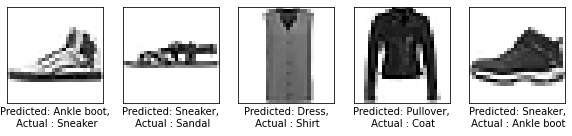

In [7]:
# Implement the code to obtain the indices of the misclassified samples
# Example output:
# misclassified_samples = [  11,   12,   14,   23,   30,   34,   39,   46,   50,   52,   55]
# misclassified_samples = [0,1,2,3,4] # dummy values
misclassified_samples = np.where(y_pred != y_test)[0]

# Visualize the (first five) misclassifications, together with the predicted and actual class
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for nr, i in enumerate(misclassified_samples[:5]):
    axes[nr].imshow(X_test.values[i].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (fmnist_classes[int(y_pred[i])],fmnist_classes[int(y_test.values[i])]))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())

plt.show();

### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 3.2</font>
Interpret the results. Are these misclassifications to be expected?

Oui c'est attendu, on remarque que les objets confondus se ressemblent.

### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 3.3</font>
Run the code below on your results to draw the complete confusion matrix and get more insight on the systematic misclassifications
of your model. A confusion matrix shows the amount of examples in for each pair of true and predicted classes. Interpret the results.
Does your model produce certain types of error more often than other types?

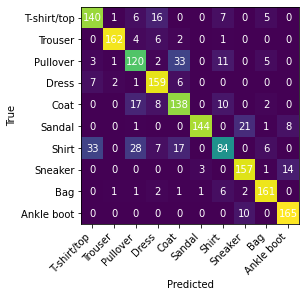

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(fmnist_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(fmnist_classes.values()))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

En examinant de près la matrice de confusion et en analysant les types d'erreurs de prédiction, nous pouvons conclure que notre modèle de classification se comporte de manière cohérente avec nos attentes. Il est clair que notre modèle est particulièrement sujet à la confusion entre les catégories d'objets qui se ressemblent étroitement. Les erreurs de prédiction sont plus fréquentes lorsqu'il y a une similitude visuelle marquée entre les classes.

Plus précisément, notre modèle a tendance à confondre les classes "coat" et "sneaker" avec d'autres classes telles que "shirt" et "pullover", ainsi que "sandal" et "ankle boot". Cette tendance à la confusion est probablement due à des caractéristiques visuelles similaires partagées entre ces catégories, ce qui rend la distinction plus difficile pour le modèle.

En résumé, notre modèle est performant lorsqu'il s'agit de distinguer des objets qui ont des caractéristiques visuelles distinctes, mais il peut rencontrer des difficultés lorsqu'il doit faire la distinction entre des catégories d'objets qui se ressemblent beaucoup.

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Interpreting model parameters </font>
Finally, we'll take a closer look at the model parameters, i.e. the coefficients of our linear models. Since we are dealing with 28x28 pixel images, we have to learn 784 coefficients. What do these coefficients mean? We'll start by plotting them as 28x28 pixel images

![ML](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 4.1</font>
Train a Logistic Regression model and a Linear SVM using their tuned hyperparameters from exercise 2.
When in doubt, use `C=1e-7` for LogReg and `C=1e-8` for the SVM.
Pass the trained model to the provided plotting function. Interpret the results in detail.
Why do you get multiple plots per model? What do the features represent in your data.
Does it seems like the models pay attention to the right features?
Do you models seem to ignore certain features? Do you observe differences in quality between the different classes? Do you observe any differences between the models?

/home/edouardo/.local/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


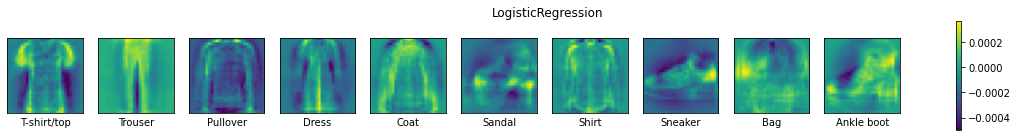

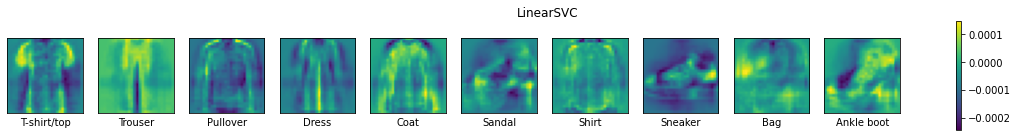

In [16]:
# Plots the coefficients of the given model as 28x28 heatmaps.
# The `name` attribute is optional, it is simply a title for the produced figure
def plot_coefficients(model, name=None):
    fig, axes = plt.subplots(1,10,figsize=(20,2))
    fig.suptitle(name if name else model.__class__.__name__)
    for i, ax in enumerate(axes):
        m = ax.imshow(model.coef_[i].reshape(28,28))
        ax.set_xlabel(fmnist_classes[i])
        ax.set_xticks(()), ax.set_yticks(())
    fig.colorbar(m, ax=axes.ravel().tolist())
    
logistic_regression = LogisticRegression(C=1e-7)
logistic_regression.fit(X_train, y_train)
linearsvm = LinearSVC(C=1e-8)
linearsvm.fit(X_train, y_train)
plot_coefficients(logistic_regression)
plot_coefficients(linearsvm)

Chaque modèle linéaire est en réalité un classificateur binaire qui résout un problème "un-contre-tous" pour chaque classe. Ainsi, pour un problème à 10 classes, il construit 10 modèles distincts, chacun formé pour prédire si une instance appartient à une classe spécifique ou non. Cela explique pourquoi on obtiens plusieurs graphiques par modèle.

Les caractéristiques dans nos données sont les pixels de l'image, et chaque pixel est représenté par un coefficient dans le modèle linéaire. Chaque graphique des coefficients correspond à une classe particulière, et chaque pixel dans le graphique représente le poids attribué à ce pixel pour cette classe. En d'autres termes, les coefficients des modèles linéaires indiquent l'influence de chaque pixel sur la prédiction de la classe respective.

On peut observer que les modèles semblent prêter plus ou moins attention aux bonnes caractéristiques. Plus ou moins, car dans certains cas comme le "sneaker", il serait pertinent d'accorder plus d'attention aux pixels de la semelle par exemple, ce qui n'est pas le cas.

Le premier modèle semble être de meilleure qualité car les coefficients sont plus nettes, et donc les pixels également.

Pour finir le premier modèle (Logistic Regression) dispose de plus de coéfficients en étant resséres avec peu de marge entre eux, ceux qui rend le modèle trés précis dans les pixels pour une meilleure prédiction, contrairement au second (Linear SVC), moins précis.

#### Solution :

Remember that linear models are typically binary classifiers. They will solve multi-class problems in a one-vs-all approach. Hence, for a 10-class problem, they will build 10 models, each one trained to predict whether an instance is from a specific class or not. This leads to 10 sets of 784 trained coefficients. Above, we plot them as 28x28 matrices, such that each coefficient is plotted at the location of their corresponding pixel value.

### <font color = #27C3E5>  </font> <font color = #fd1b1b> Exercise 4.2</font>
Repeat the previous exercise, but now only with logistic regression. In addition to a tuned version, also add a model that overfits a lot and one that underfits a lot. Interpret and explain the results.

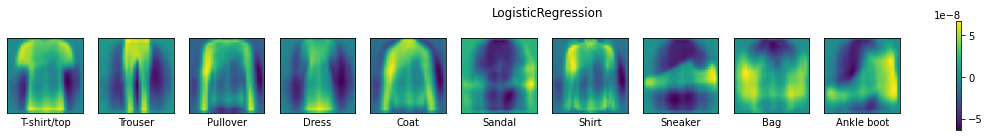

In [17]:
# Underfitting
logistic_regression = LogisticRegression(C=1e-12)
logistic_regression.fit(X_train, y_train)
plot_coefficients(logistic_regression)

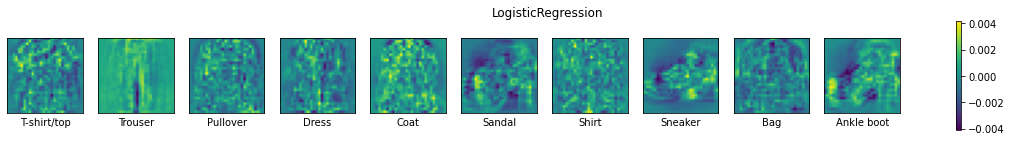

In [18]:
# Overfitting
logistic_regression = LogisticRegression(C=1e12)
logistic_regression.fit(X_train, y_train)
plot_coefficients(logistic_regression)

Pour résumer les résultats obtenus, on conclus que pour le modèle underfitting, le modèle est trop simple il n'y a pas assez de dégradé de couleurs de pixels avec une plage trop grande dans les coéfficients, ce qui laisse plus la place à confondre les éléments, contrairement au modèle overfitting, trop de dégradé de couleurs, trop de précision dans les pixels, ce qui fait donc un modèle trop complexe.